<a href="https://colab.research.google.com/github/Bollegala/RelComp/blob/master/supervised_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 993kB 3.4MB/s 


W0626 12:36:03.311433 140628384810880 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

E=100


W0626 12:36:10.528184 140628384810880 deprecation.py:506] From <ipython-input-1-d7cefcf71caf>:92: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 18, 20, 21, 25, 26, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 42, 43, 44, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 74, 75, 76, 78, 79, 80, 81, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 131, 132, 133, 134, 135, 136, 138, 139, 141, 142, 143, 146, 147, 149, 150, 151, 152, 153]


W0626 12:36:12.999456 140628384810880 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



After 0 training steps, train loss: 1845.61, test loss: 1850.01
After 500 training steps, train loss: 1571.9, test loss: 1590.51
After 1000 training steps, train loss: 1330.34, test loss: 1359.51
After 1500 training steps, train loss: 1121.48, test loss: 1160.72
After 2000 training steps, train loss: 940.942, test loss: 978.581
After 2500 training steps, train loss: 790.395, test loss: 825.981
After 3000 training steps, train loss: 664.686, test loss: 696.385
After 3500 training steps, train loss: 561.873, test loss: 589.996
After 4000 training steps, train loss: 470.325, test loss: 491.734
After 4500 training steps, train loss: 392.45, test loss: 408.661
After 5000 training steps, train loss: 321.43, test loss: 335.128
After 5500 training steps, train loss: 260.428, test loss: 271.748
After 6000 training steps, train loss: 200.266, test loss: 208.885
After 6500 training steps, train loss: 145.704, test loss: 152.551
After 7000 training steps, train loss: 94.9666, test loss: 98.924
Aft

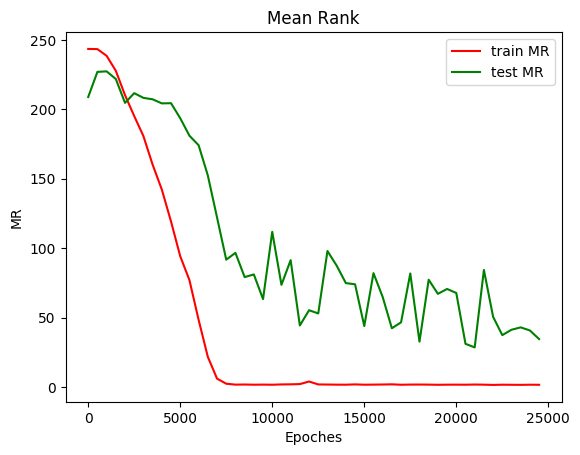

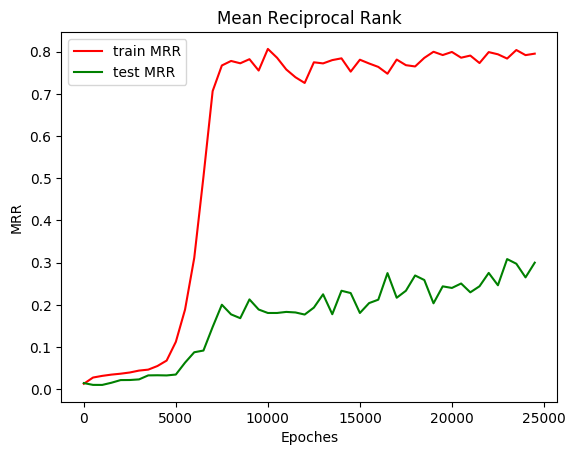

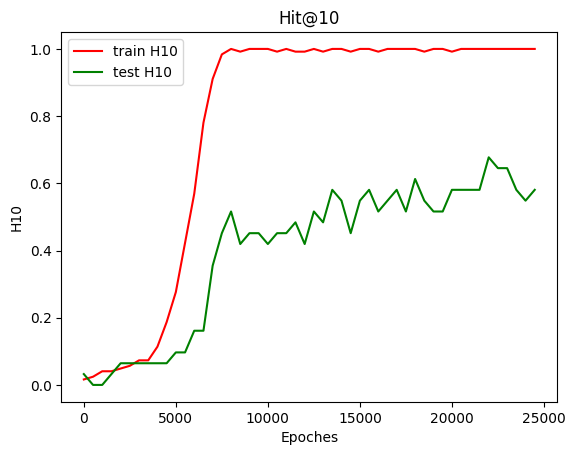

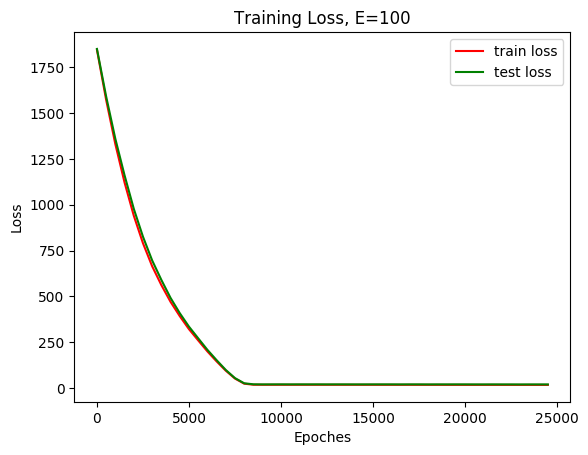

rank within 474 relations
rank within range(0, 474) relations
 MR: 45.2258, MRR: 0.263182, H10: 0.548387, rA/rB rank: 12 (Supervised Method)
 MR: 219.065, MRR: 0.0130235, H10: 0.0322581, rA/rB rank: 24 (Multiply)
 MR: 164.806, MRR: 0.0303053, H10: 0.0645161, rA/rB rank: 17 (Element_wise Multiply)
 MR: 260.097, MRR: 0.0072168, H10: 0, rA/rB rank: 31 (Add)


In [0]:
import tensorflow as tf
import numpy as np
from itertools import islice
import random
import matplotlib.pyplot as plt
import math

# download file from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

"""
# setting up Google sheet
!pip install --upgrade -q gspread
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
"""

from google.colab import files



# List the IDs of each file in the menu
# Results in Root:
# title: KBComp, id: 12g2giJFbx_9LVqDOKj-5gnm08XQDV5R6, mimeType: application/vnd.google-apps.folder
def listIDs(drive,file):
    address = file.split('/')
    file_id = '12g2giJFbx_9LVqDOKj-5gnm08XQDV5R6'     # this is the ID of KBComp folder
    for i in range(len(address)):
        #file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
        file_list = drive.ListFile({'q':"'" + file_id + "' in parents and trashed=false"}).GetList()
        for file1 in file_list:
            if file1['title'] == address[i]:
              #print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))
              file_id = file1['id']
    return file_id    

  
# load file from google drive into the VM of colab
def loadExternalData(address, name):     
    id = listIDs(drive,address)

    # Load a file by ID 
    downloaded = drive.CreateFile({'id': id})
    downloaded.GetContentFile(name)


def readEmbeddings(name):
    embeddings=np.load("/content/"+name,encoding = 'latin1', allow_pickle=True).item()
    entity = embeddings['ent_embeddings']
    d = entity.shape[1]
    r1 = embeddings['R1'].reshape(-1, d, d)
    r2 = embeddings['R2'].reshape(-1, d, d)
    return entity, r1, r2

def read_relations():
    relations = {}
    # file = open("benchmarks/FB15K474/relation2id.txt")
    file = open("/content/FB474-relation2id")
    for relation in islice(file, 1, None):
        rel = relation.split()[0]
        id = int(relation.split()[1])
        relations[rel] = id
    
    R = set()
    relcompstats = []
    file2 = open("relcompstats_filter")
    for line in file2:
        rA_id = relations[line.split()[0]]
        rB_id = relations[line.split()[1]]
        rC_id = relations[line.split()[2]]
        relcompstats.append((rA_id, rB_id, rC_id))
        R.update([rA_id, rB_id, rC_id])
    # return composed relations ID  with the format(rA_id, rB_id, rC_id)
    return R, relcompstats

def add_layer(inputs, in_size, out_size, keep_prob, activation_function=None):
        Weights = tf.Variable(tf.random_normal([in_size, out_size], stddev=1, seed=1))
        mul = tf.matmul(inputs, Weights) 
        mul = tf.nn.dropout(mul, keep_prob)
        if activation_function is None:
            outputs = mul
        else:
            outputs = activation_function(mul)
        return Weights, outputs
    
def construct_data(dim):
    entity, r1, r2 = readEmbeddings("FB474-Embeddings_d=" + str(dim))
    
    X = np.zeros(shape=(154,4* dim* dim))
    Y = np.zeros(shape=(154,2* dim* dim))
    i = 0
    #R, relation_compose = read_relations()
    for relation_tuples in relation_compose:
        rA_id = relation_tuples[0]
        rB_id = relation_tuples[1]
        rC_id = relation_tuples[2]

        rA_linear = np.append(r1[rA_id].reshape(-1),r2[rA_id].reshape(-1))
        rB_linear = np.append(r1[rB_id].reshape(-1),r2[rB_id].reshape(-1))
        input_feature = np.append(rA_linear, rB_linear)
        target_output = np.append(r1[rC_id].reshape(-1),r2[rC_id].reshape(-1))

        X[i] = input_feature
        Y[i] = target_output
        i = i+1
         
    relations = np.zeros(shape=(474,2*dim*dim))
    for i in range(474):
        relations[i] = np.append(r1[i].reshape(-1), r2[i].reshape(-1))
    return X, Y, relations
    


# --------------------------------- Supervised Method ----------------------------------
class KbComp():
    def __init__(self,d, layer_num, m, training_epoch, dropout, l2_reg):
        self.dim = d
        self.embedding_dim = d*d
        self.hidden_layer_num = layer_num
        self.hidden_layer_tuples = m
        self.learning_rate = 5e-4
        self.training_epoch = training_epoch
        self.dropout = dropout
        self.reg = l2_reg
               
        self.sess = tf.Session()       
        self.current_folder = 0
    
    def set_inputs_outputs(self, i):
        self.X, self.Y, self.relations = construct_data(self.dim)
        proporation = 0.8
        train_num = int(154 * proporation)
        test_num = 154 - train_num

        index = np.arange(154) # [0,1,2,...,153]
        np.random.seed(3)
       
        np.random.shuffle(index) 
        #print(index)
        test_index = index[test_num:2*test_num]
        train_index = list(set(index) - set(test_index))
        #train_index = index[:train_num]
        #test_index = index[train_num:]
        
        if i==None:
            self.X_train = self.X[train_index]
            self.Y_train = self.Y[train_index]
            self.X_test = self.X[test_index]
            self.Y_test = self.Y[test_index] 
                    
        elif i< 2:         
            cross_validation_index = index[24*i:24*i+24]
            self.X_test = self.X[cross_validation_index]
            self.Y_test = self.Y[cross_validation_index]
            train_index = list(set(train_index) - set(cross_validation_index))
            self.X_train = self.X[train_index]
            self.Y_train = Y[train_index]
        elif i<5:   
            cross_validation_index = index[25*i-2:25*i+23]
            self.X_test = self.X[cross_validation_index]
            self.Y_test = self.Y[cross_validation_index]
            train_index = list(set(train_index) - set(cross_validation_index))
            self.X_train = self.X[train_index]
            self.Y_train = self.Y[train_index]
            
        print(train_index)
            
            
         
        
            
    def construct_predictions(self):
        # placeholders for inputs,outputs
        self.x = tf.placeholder(tf.float32,shape=(None,4*self.embedding_dim),name='features')  
        self.y_ = tf.placeholder(tf.float32,shape=(None,2*self.embedding_dim),name='labels')
        self.data_num = tf.placeholder(tf.int32)  # the number of input data 
        self.length = tf.identity(self.data_num)
        self.keep_prob = tf.placeholder(tf.float32)
        
        # the outputs of each layer, start with 0 layer which is the inputs x
        output = {}
        output[0] = self.x
        # m is the tuples numbers of each layer outputs, start with 0 layer, is the tuples in the input x
        self.hidden_layer_tuples[0] = 4*self.embedding_dim 
        # w is the weight between layers
        w = {} 
        
        # ---------- add L2 regulation -----------
        for i in range(self.hidden_layer_num):
            w[i], output[i+1] = add_layer(inputs=output.get(i), in_size=self.hidden_layer_tuples.get(i), out_size=self.hidden_layer_tuples.get(i+1), keep_prob=self.keep_prob, activation_function=tf.nn.tanh)
            tf.add_to_collection(tf.GraphKeys.WEIGHTS, w[i]) 
        u, self.y = add_layer(inputs=output.get(self.hidden_layer_num), in_size=self.hidden_layer_tuples.get(self.hidden_layer_num), out_size=2*self.embedding_dim, keep_prob=self.keep_prob,activation_function=None)
        tf.add_to_collection(tf.GraphKeys.WEIGHTS, u)
        regularizer = tf.contrib.layers.l2_regularizer(scale=1e-10)
        reg_term = tf.contrib.layers.apply_regularization(regularizer)
        
        # define cost
        # rel_1/2 are target relation embeddings, rel1/2 are produced relation embeddings
        rel_1 = tf.slice(self.y_, [0, 0], [self.length, self.embedding_dim])
        rel_2 = tf.slice(self.y_, [0, self.embedding_dim ], [self.length, self.embedding_dim])
        rel1 = tf.slice(self.y, [0, 0], [self.length, self.embedding_dim])
        rel2 = tf.slice(self.y, [0, self.embedding_dim], [self.length, self.embedding_dim])

        self.score = tf.sqrt( tf.reduce_sum( tf.square(rel_1 - rel1), axis = 1) ) + tf.sqrt( tf.reduce_sum( tf.square(rel_2 - rel2), axis = 1) ) 
        if self.reg:
            self.cost = tf.reduce_mean( self.score ) + reg_term
        else:
            self.cost = tf.reduce_mean( self.score ) 
        self.train_op = tf.train.AdamOptimizer(self.learning_rate).minimize(self.cost)
        
    def output_predict(self):
        predict = self.sess.run(self.y, feed_dict={self.x:self.X, self.keep_prob:1})
        d = int(math.sqrt(self.X.shape[1] /4)) 
        predict_1 = predict[ : , 0:d*d]
        predict_2 = predict[ : , d*d:2*d*d]
        
        #name = "predict_E=" + str(d) + ".npz"
        np.save("predict.npy", predict)
        np.savez("predict.npz", R1=predict_1, R2 = predict_2)
        #np.save('predict.npy', predict, allow_pickle = False)
        #files.download("predict.npz")
        files.download("predict.npy")
        
        embeddings = np.load("predict.npz")
        predict_1 = embeddings["R1"].reshape(-1,d,d)
        predict_2 = embeddings["R2"].reshape(-1,d,d)

        
        
    def evaluation(self,eval_set, data_set):
        if data_set=="train": 
            feed_x = self.X_train
            feed_y = self.Y_train
        if data_set=="test":
            feed_x = self.X_test
            feed_y = self.Y_test
        predict = self.sess.run(self.y, feed_dict={self.x:feed_x, self.keep_prob:1})
        test_num = self.sess.run(self.length, feed_dict={self.data_num:len(feed_x)})
        
        rank_sum = 0
        inverse_rank_sum = 0
        top10_sum = 0
        accurate_num = 0  


        rank_num = 0 # this the number of composed relations which is more related with rA and rB, not target relation

        for i in range(test_num):
            rA_1 = feed_x[i][:self.embedding_dim]
            rA_2 = feed_x[i][self.embedding_dim:2*self.embedding_dim]
            rB_1 = feed_x[i][2*self.embedding_dim:3*self.embedding_dim]
            rB_2 = feed_x[i][3*self.embedding_dim:4*self.embedding_dim]
            composed_1 = predict[i][:self.embedding_dim]
            composed_2 = predict[i][self.embedding_dim:2*self.embedding_dim]
            score_rA = np.sqrt(np.sum(np.square(composed_1 - rA_1))) + np.sqrt(np.sum(np.square(composed_2 - rA_2)))
            score_rB = np.sqrt(np.sum(np.square(composed_1 - rB_1))) + np.sqrt(np.sum(np.square(composed_2 - rB_2)))              
            target_1 = feed_y[i][:self.embedding_dim]
            target_2 = feed_y[i][self.embedding_dim:2*self.embedding_dim]
            target_score = np.sqrt(np.sum(np.square(composed_1 - target_1))) + np.sqrt(np.sum(np.square(composed_2 - target_2)))

            norms = []
            for j in eval_set:
                RelWalk_1 = self.relations[j][:self.embedding_dim]
                RelWalk_2 = self.relations[j][self.embedding_dim:2*self.embedding_dim]
                norm = np.sqrt(np.sum(np.square(composed_1 - RelWalk_1))) + np.sqrt(np.sum(np.square(composed_2 - RelWalk_2)))
                norms.append(norm)
            norms.sort()                    
            rank = norms.index(target_score)+1   
            # compare rank with rA rank and rB rank
            rank_rA = norms.index(score_rA)+1 
            rank_rB = norms.index(score_rB)+1 
            if rank_rA < rank or rank_rB < rank:
                rank_num += 1                    
            rank_sum += rank 
            inverse_rank_sum += 1/rank
           
            if(rank <= 10):
                top10_sum = top10_sum + 1
            if rank ==1 : accurate_num += 1
        mean_rank = rank_sum / test_num
        mean_inverse_rank = inverse_rank_sum / test_num
        H10 = top10_sum / test_num  
        
        ratio = float(accurate_num/test_num)    
        
        
        
        return mean_rank, mean_inverse_rank, H10, rank_num
        
    def train_model(self, plot):
        #self.set_inputs_outputs()
        init = tf.global_variables_initializer()  
        self.sess.run(init)
        
        x_axis = []
        train_MR = []
        test_MR = []
        train_MRR = []
        test_MRR = []
        train_H10 = []
        test_H10 = []
        train_losses = []
        test_losses = []
        hist_loss = []
        
        # apply stochastic gradient descent
        batch_size = 25
        stop = False
        epoch_num = 0        
        patience_cnt = 0

      
        #while stop==False:
        for epoch_num in range(self.training_epoch):
            slice = random.sample(range(len(self.X_train)), batch_size) 
            x_batch = self.X_train[slice]
            y_batch = self.Y_train[slice]
            
            # add dropout
            self.sess.run(self.train_op,feed_dict={self.x:x_batch , self.y_:y_batch, self.data_num:batch_size, self.keep_prob:self.dropout}) 
 
            if epoch_num % 500 == 0: 
                x_axis.append(epoch_num)                
                train_loss = self.sess.run(self.cost, feed_dict={self.x:self.X_train , self.y_:self.Y_train, self.data_num:len(self.X_train), self.keep_prob:1})        
                test_loss = self.sess.run(self.cost, feed_dict={self.x:self.X_test , self.y_:self.Y_test, self.data_num:len(self.X_test), self.keep_prob:1}) 
                #------------------------- evaluation matrices on training data ---------------------------------------------
                #mean_rank, mean_inverse_rank, H10, rank_num = self.evaluation(R,"train")
                mean_rank, mean_inverse_rank, H10, rank_num = self.evaluation(range(474),"train")
                train_MR.append(mean_rank)
                train_MRR.append(mean_inverse_rank)
                train_H10.append(H10)
                train_losses.append(train_loss)
                #------------------------- evaluation matrices on testing data ---------------------------------------------
                #mean_rank, mean_inverse_rank, H10, rank_num = self.evaluation(R,"test")
                mean_rank, mean_inverse_rank, H10, rank_num = self.evaluation(range(474),"test")
                test_MR.append(mean_rank)
                test_MRR.append(mean_inverse_rank)
                test_H10.append(H10)
                test_losses.append(test_loss) 
                
                print("After %d training steps, train loss: %g, test loss: %g" %(epoch_num, train_loss, test_loss)) 
            epoch_num += 1
            
        if plot:  
            # draw the diagram
            plt.style.use('default')
            print("MR train:%g, test:%g" %(min(train_MR), min(test_MR)))
            print("MRR train:%g, test:%g" %(max(train_MRR), max(test_MRR)))
            print("H10 train:%g, test:%g" %(max(train_H10), max(test_H10)))
            plt.plot(x_axis, train_MR, 'r', label='train MR')               
            plt.plot(x_axis, test_MR, 'g', label='test MR')
            plt.legend() 
            plt.xlabel('Epoches') 
            plt.ylabel('MR') 
            plt.title('Mean Rank') 
            plt.show()

            plt.plot(x_axis, train_MRR, 'r', label='train MRR')               
            plt.plot(x_axis, test_MRR, 'g', label='test MRR')
            plt.legend()
            plt.xlabel('Epoches')
            plt.ylabel('MRR')
            plt.title('Mean Reciprocal Rank') 
            plt.show()

            plt.plot(x_axis, train_H10, 'r', label='train H10')               
            plt.plot(x_axis, test_H10, 'g', label='test H10')
            plt.legend()
            plt.xlabel('Epoches')
            plt.ylabel('H10')
            plt.title('Hit@10')
            plt.show()      


            plt.plot(x_axis, train_losses, 'r', label='train loss')               
            plt.plot(x_axis, test_losses, 'g', label='test loss')
            plt.legend()
            plt.xlabel('Epoches')
            plt.ylabel('Loss')
            title = "Training Loss, E=" + str(self.dim) 
            plt.title(title) 
            plt.show()
        
        
       
        '''        
        
        MR_optimal = min(test_MR)
        MRR_optimal = max(test_MRR)
        H10_optimal = max(test_H10)
        print("MR: %g, MRR: %g, H10: %g (Supvised Training)" %(MR_optimal, MRR_optimal, H10_optimal))
        print("Number of relations in test set which is more related with rA and rB: %g " %(rank_num))
        '''
   
    
         
        

# --------------------------------- Unsupervised Method -------------------------------
def multiply(rA_1, rA_2, rB_1, rB_2):
    rC_1 = np.dot(rA_1, rB_1)
    rC_2 = np.dot(rA_2, rB_2)
    return rC_1, rC_2

def elemMultiply(rA_1, rA_2, rB_1, rB_2):
    rC_1 = np.multiply(rA_1, rB_1)
    rC_2 = np.multiply(rA_2, rB_2)
    return rC_1, rC_2

def add(rA_1, rA_2, rB_1, rB_2):
    rC_1 = np.add(rA_1, rB_1)
    rC_2 = np.add(rA_2, rB_2)
    return rC_1, rC_2

def multiply_trans(rA_1, rA_2, rB_1, rB_2):
    rC_1 = np.dot(rA_1, rB_1.T)
    rC_2 = np.dot(rA_2.T, rB_2)
    return rC_1, rC_2        
        
def compose(method, dim, X_test, Y_test, eval_set):
    entity, r1_embeddings, r2_embeddings = readEmbeddings("FB474-Embeddings_d=" + str(dim))
    #R, relation_compose = read_relations()

    # for 154 composed relations
    rank_sum = 0
    inverse_rank_sum = 0
    top10_sum = 0
    rank_num = 0
    for i in range(len(X_test)):
        rA_1 = X_test[i][:dim*dim].reshape(dim,dim)
        rA_2 = X_test[i][dim*dim:2*dim*dim].reshape(dim,dim)
        rB_1 = X_test[i][2*dim*dim:3*dim*dim].reshape(dim,dim)
        rB_2 = X_test[i][3*dim*dim:].reshape(dim,dim)
        
        target_1 = Y_test[i][:dim*dim].reshape(dim,dim)
        target_2 = Y_test[i][dim*dim:2*dim*dim].reshape(dim,dim)

        # composed embeddings
        if(method == "multiply"):
            rC_1_com, rC_2_com = multiply(rA_1, rA_2, rB_1, rB_2)
        elif(method == "elemMultiply"):
            rC_1_com, rC_2_com = elemMultiply(rA_1, rA_2, rB_1, rB_2)
        elif(method == "add"):
            rC_1_com, rC_2_com = add(rA_1, rA_2, rB_1, rB_2)
        elif (method == "multiply_trans"):
            rC_1_com, rC_2_com = multiply_trans(rA_1, rA_2, rB_1, rB_2)
        
        correct_score = np.linalg.norm(target_1 - rC_1_com, ord='fro') + np.linalg.norm(target_2 - rC_2_com, ord='fro')
        score_rA = np.linalg.norm(rA_1 - rC_1_com, ord='fro') + np.linalg.norm(rA_2 - rC_2_com, ord='fro')
        score_rB = np.linalg.norm(rB_1 - rC_1_com, ord='fro') + np.linalg.norm(rB_2 - rC_2_com, ord='fro')
        scores = []
        correct = ()
   
        # for each 154 relation, compute the score with data set(474)
        #for rel_id in range(len(r1_embeddings)):
        #for rel_id in R:
        for rel_id in eval_set:
            rC_1 = r1_embeddings[rel_id]
            rC_2 = r2_embeddings[rel_id]
            # score = np.linalg.norm(rC_1 - rC_1_com, ord=2, keepdims=True) + np.linalg.norm(rC_2 - rC_2_com, ord=2, keepdims=True)
            score = np.linalg.norm(rC_1 - rC_1_com, ord='fro') + np.linalg.norm(rC_2 - rC_2_com, ord='fro')
            scores.append(score)
        scores.sort()   
            
            
        rank = scores.index(correct_score) + 1
        rank_rA = scores.index(score_rA)+1 
        rank_rB = scores.index(score_rB)+1 
        if rank_rA < rank or rank_rB < rank:
            rank_num += 1 
        rank_sum += rank 
        inverse_rank_sum += 1/float(rank)
        if(rank <= 10):
            top10_sum = top10_sum + 1
    mean_rank = rank_sum / len(X_test)
    mean_inverse_rank = inverse_rank_sum / len(X_test)
    H10 = float(top10_sum) / len(X_test)
    return mean_rank, mean_inverse_rank, H10, rank_num
    
def evaluation(model, eval_set):
    results = []
    
    print("rank within " + str(eval_set) +  " relations")
    mean_rank, mean_inverse_rank, H10, rank_num = model.evaluation(eval_set, "test")
    results.append(mean_rank)
    results.append(mean_inverse_rank)
    results.append(H10)
    results.append(rank_num)
    print(" MR: %g, MRR: %g, H10: %g, rA/rB rank: %g (Supervised Method)"  %(mean_rank, mean_inverse_rank, H10, rank_num))
    
    mean_rank, mean_inverse_rank, H10, rank_num = compose("multiply", model.dim, model.X_test, model.Y_test, eval_set)
    results.append(mean_rank)
    results.append(mean_inverse_rank)
    results.append(H10)
    print(" MR: %g, MRR: %g, H10: %g, rA/rB rank: %g (Multiply)"  %(mean_rank, mean_inverse_rank, H10, rank_num))
    
    mean_rank, mean_inverse_rank, H10, rank_num = compose("elemMultiply", model.dim, model.X_test, model.Y_test, eval_set)
    results.append(mean_rank)
    results.append(mean_inverse_rank)
    results.append(H10)
    print(" MR: %g, MRR: %g, H10: %g, rA/rB rank: %g (Element_wise Multiply)"  %(mean_rank, mean_inverse_rank, H10, rank_num))
    
    mean_rank, mean_inverse_rank, H10, rank_num = compose("add", model.dim, model.X_test, model.Y_test, eval_set)
    results.append(mean_rank)
    results.append(mean_inverse_rank)
    results.append(H10)
    print(" MR: %g, MRR: %g, H10: %g, rA/rB rank: %g (Add)"  %(mean_rank, mean_inverse_rank, H10, rank_num))
    
    #mean_rank, mean_inverse_rank, H10, rank_num = compose("multiply_trans", model.dim, model.X_test, model.Y_test, eval_set)
    #print(" MR: %g, MRR: %g, H10: %g, rA/rB rank: %g (Multiply_trans)"  %(mean_rank, mean_inverse_rank, H10, rank_num))  
    
    return results
    
                
if __name__=="__main__":
    """
    sh = gc.create('Results(d=50)')
    worksheet = gc.open('Results(d=50)').sheet1
    worksheet.insert_row(["MR(Supervised)", "MRR", "H10", "Rank_num" "MR(Multiply)", "MRR", "H10", "MR(Element-wise)", "MRR", "H10", "MR(Add)", "MRR", "H10"], 1)
    """
    # read relation embeddings
    loadExternalData('embeddings/RelWalk_Embeddings/FB15K474/Embeddings_d=20.npy', 'FB474-Embeddings_d=20')
    loadExternalData('embeddings/RelWalk_Embeddings/FB15K474/Embeddings_d=50.npy', 'FB474-Embeddings_d=50')
    loadExternalData('embeddings/RelWalk_Embeddings/FB15K474/Embeddings_d=100.npy', 'FB474-Embeddings_d=100')

    # read 154 composed relations
    loadExternalData('benchmarks/FB15K474/relation2id.txt', 'FB474-relation2id')
    loadExternalData('relcompstats_filter.txt', 'relcompstats_filter')
    R, relation_compose = read_relations()
    
    
 
    """
    
    
    print("E=20")
    model_E20 = KbComp(d=20, layer_num=1, m={1:300}, training_epoch = 25000, dropout=0.5, l2_reg=True)
    
    '''    
    #---------------------------This is to adjust the hyperparameters----------------------------
    for i in range(5):
        model_E20.set_inputs_outputs(i) 
        model_E20.construct_predictions()
        model_E20.train_model(plot=True)     
    '''
    #---------------------------This is to evaluate the trained model----------------------------
    model_E20.set_inputs_outputs(None) 
    model_E20.construct_predictions()
    model_E20.train_model(plot=True)
    print("rank within 474 relations")
    results = evaluation(model_E20,range(474))
    #model_E20.output_predict()
    #worksheet.insert_row(results, i + 2)
    #print("rank within R relations")
    #evaluation(model_E20,R)
    
    
    print("E=50")
    model_E50 = KbComp(d=50, layer_num=2, m={1:100, 2:600}, training_epoch = 25000, dropout=0.5, l2_reg = True)   
    '''
    #---------------------------This is to adjust the hyperparameters----------------------------
    for i in range(5):
        model_E50.set_inputs_outputs(i) 
        model_E50.construct_predictions()
        model_E50.train_model(plot=True)   
    '''  
    #---------------------------This is to evaluate the trained model----------------------------
    model_E50.set_inputs_outputs(None) 
    model_E50.construct_predictions()
    model_E50.train_model(plot=True)
    print("rank within 474 relations")
    results = evaluation(model_E50,range(474))
    #model_E50.output_predict()
    #worksheet.insert_row(results, i + 2)
    #print("rank within R relations")
    #evaluation(model_E50,R)
    """
    
    print("E=100")
    model_E100 = KbComp(d=100, layer_num=2, m={1:30, 2:100}, training_epoch=25000, dropout=0.5, l2_reg=True)
    model_E100.set_inputs_outputs(None) 
    model_E100.construct_predictions()
    model_E100.train_model(plot=True)
    print("rank within 474 relations")
    results = evaluation(model_E100,range(474))
    
    